In [18]:
import numpy as np
import pandas as pd

In [19]:
df=pd.read_csv("mobile_recommendation_system_dataset.csv")
df.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


In [20]:
shape=df.shape
shape

(2546, 5)

In [21]:
#checking the  missing values
missing_values=df.isnull().sum()
missing_values

name        0
ratings     0
price       0
imgURL      0
corpus     12
dtype: int64

In [22]:
#to clean the  data by removing the missing values
df_clean=df.dropna()
clean_shape=df_clean.shape
# checking for  missing values in  cleaned data
clean_missing_values=df_clean.isnull().sum()
clean_missing_values

name       0
ratings    0
price      0
imgURL     0
corpus     0
dtype: int64

In [23]:
import re
def extract_storage(corpus):
    match=re.search(r"Storage(\d+)",corpus)
    if match:
        return int(match.group(1))
    return None
df_clean['Storage']=df_clean['corpus'].apply(extract_storage)

C:\Users\sameer\AppData\Local\Temp\ipykernel_8828\771938468.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Storage']=df_clean['corpus'].apply(extract_storage)


In [24]:
df_clean['Storage']

0       128.0
1       128.0
2        64.0
3       256.0
4       128.0
        ...  
2540    128.0
2541     64.0
2542    128.0
2544    256.0
2545    128.0
Name: Storage, Length: 2534, dtype: float64

In [25]:
def extract_ram(corpus):
    match=re.search(r"RAM(\d+)",corpus)
    if match:
        return int(match.group(1))
    return None

def extract_system(corpus):
    match=re.search(r"System(.*?)Processor",corpus)
    if match:
        return match.group(1).strip()
    return None
def extract_processor(corpus):
    match=re.search(r"Processor (.*?) ",corpus)
    if match:
        return match.group(1).strip()
    return None
df_clean["RAM"]=df_clean["corpus"].apply(extract_ram)
df_clean["System"]=df_clean["corpus"].apply(extract_system)
df_clean["Processor"]=df_clean["corpus"].apply(extract_processor)
df_clean.head()

C:\Users\sameer\AppData\Local\Temp\ipykernel_8828\2832421750.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["RAM"]=df_clean["corpus"].apply(extract_ram)
C:\Users\sameer\AppData\Local\Temp\ipykernel_8828\2832421750.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["System"]=df_clean["corpus"].apply(extract_system)
C:\Users\sameer\AppData\Local\Temp\ipykernel_8828\2832421750.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android 12,TypeMediatek
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android Pie 9.0,TypeMediaTek
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android 11,Speed2.4
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android Q 11,TypeQualcomm
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS 15,TypeA15


In [26]:
#checking unique values for System and processor
unique_system=df_clean["System"].unique()
unique_processors=df_clean["Processor"].unique()
list(unique_system)

['Android 12',
 'Android Pie 9.0',
 'Android 11',
 'Android Q 11',
 'iOS 15',
 'iOS 9',
 'Android 13',
 'Android Pie 9',
 'Android Nougat 7',
 'Android 10',
 'iOS 16',
 None,
 'Android Q Android Q 12.5',
 'Android Oreo 8.1',
 'Android Marshmallow 6.0.1',
 'Android Oreo 8.1.0',
 'Android 13 (Go Edition)',
 'Android Android 12',
 'Android Q 10',
 'iOS 14.2',
 'Android Pie Android v9.0 (Pie)',
 'Android Andriod 11',
 'Android Android 10',
 'Android HiOS 8.6 based on Android 12-Go Edition',
 'Android Nougat 7.1',
 'iOS 14',
 'Android Android 13',
 'iOS 12',
 'Android 12 Go',
 'iOS 7',
 'Android Nougat 7.1.2',
 'Android Oreo V11',
 'Android ANdroid 13 OxygenOS',
 'Android Android 13.0',
 'Android Android v12.0',
 'Android Android 11',
 'Android Pie 10',
 'Android Oreo 8.0',
 'Q 10',
 'Android Q ANDROID 10',
 'Android Q 12',
 'iOS 13',
 'Android Android 11 Go',
 'Android 10 (Go Edition)',
 'Android Oxygen OxygenOS based on Android 13',
 'Series 30 Feature phone',
 'Android Lollipop 5.1',
 'A

In [27]:
list(unique_processors)

['TypeMediatek',
 'TypeMediaTek',
 'Speed2.4',
 'TypeQualcomm',
 'TypeA15',
 'TypeA9',
 None,
 'Speed2',
 'TypeMTK',
 'Speed3.19',
 'TypeDimensity',
 'TypeUnisoc',
 'Speed2.3',
 'TypeA12',
 'TypeA16',
 'Speed0.1',
 'TypeExynos',
 'TypeHelio',
 'Speed2.84',
 'TypeMT6763TProcessor',
 'Speed1.8',
 'TypeA14',
 'Speed2.2',
 'TypeA13',
 'Speed2.9',
 'TypeA6',
 'Speed3.05',
 'TypeApple',
 'TypeSnapdragon',
 'TypeQualcomm®',
 'TypeA11',
 'Speed2.99',
 'TypeA10',
 'Speed3.2',
 'Speed208',
 'TypeMeditek',
 'TypeA8',
 'TypeSamsung',
 'TypeG37Processor',
 'Speed1.6',
 'TypeOcta',
 'Type2nd-gen',
 'TypeT612Processor',
 'Typequalcomm',
 'TypeOcta-coreProcessor',
 'Speed1.2',
 'TypeSpreadtrum',
 'TypeUNISOC',
 'TypeSEC',
 'TypeMTK6739',
 'TypeSDM710Processor',
 'Speed3',
 'TypeNA',
 'Speed2.05',
 'Speed2.42',
 'Speed2.8',
 'TypeUniSoc',
 'Type1.6',
 'Type2.0',
 'Type7nm',
 'Speed2.73',
 'Speed90',
 'TypeMediateckProcessor',
 'Speed900',
 'Speed120',
 'Speed2.7',
 'Speed1.3',
 'Speed1600',
 'TypeEOLPr

In [28]:
def clean_system(system):
    if pd.isnull(system):
        return None
    if 'android' in system.lower():
        return 'Android'
    if 'ios' in system.lower():
        return 'iOS'
    if 'tizen' in system.lower():
        return 'Tizen'
    
df_clean['System']=df_clean["System"].apply(clean_system)

unique_system_clean=df_clean["System"].unique()

unique_system_clean

C:\Users\sameer\AppData\Local\Temp\ipykernel_8828\3272703472.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['System']=df_clean["System"].apply(clean_system)


array(['Android', 'iOS', None, 'Tizen'], dtype=object)

In [29]:
df_clean["System"].value_counts()

Android    2089
iOS         373
Tizen         1
Name: System, dtype: int64

In [30]:
def clean_processor(processor):
    if pd.isnull(processor):
        return None
    if 'mediatek' in processor.lower():
        return 'MediaTek'
    if 'qualcomm' in processor.lower():
        return 'Qualcomm'
    if 'apple' in processor.lower():
        return 'Apple'
    return "Other"
df_clean['Processor']=df_clean["Processor"].apply(clean_processor)
unique_processor_clean=df_clean["Processor"].unique()
unique_processor_clean

C:\Users\sameer\AppData\Local\Temp\ipykernel_8828\2109496453.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Processor']=df_clean["Processor"].apply(clean_processor)


array(['MediaTek', 'Other', 'Qualcomm', None, 'Apple'], dtype=object)

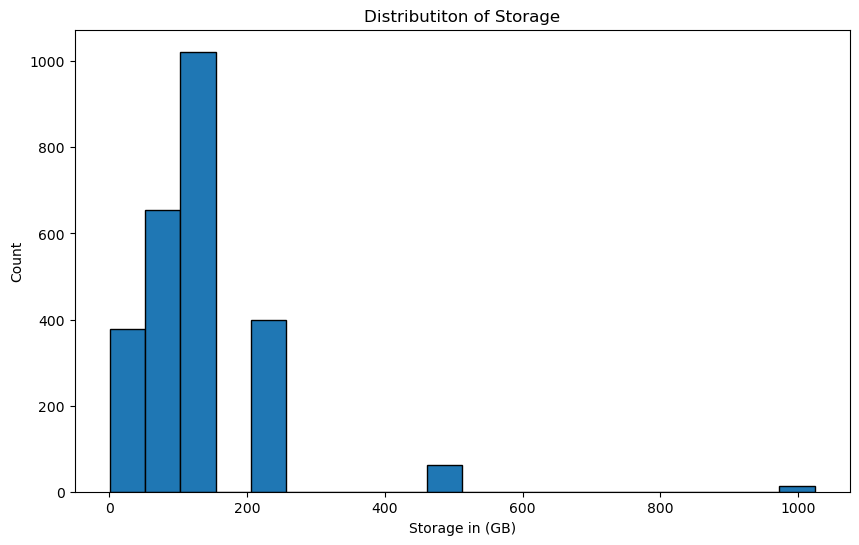

In [31]:
# Plot a histogram of the 'Storage' feature

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df_clean['Storage'],bins=20,edgecolor="black")
plt.title("Distributiton of Storage")
plt.xlabel("Storage in (GB)")
plt.ylabel("Count")
plt.show()

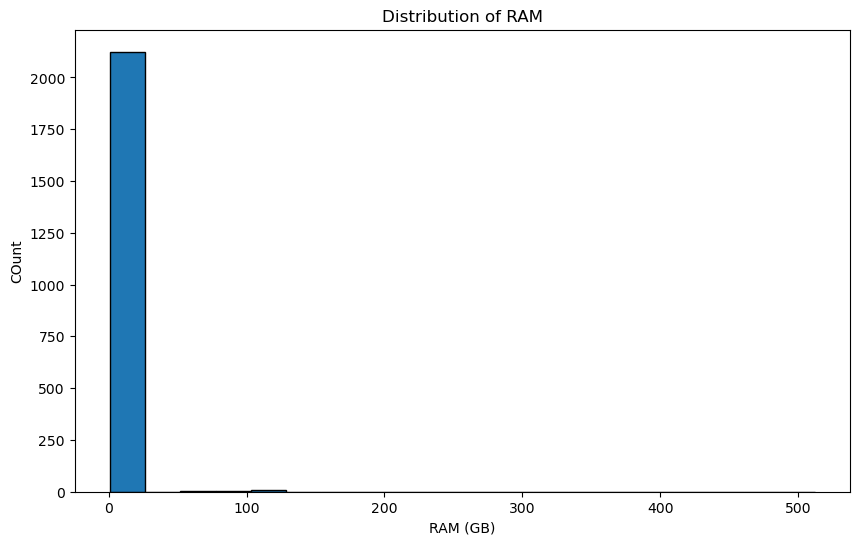

In [32]:
#histogram for ram
plt.figure(figsize=(10,6))
plt.hist(df_clean["RAM"].dropna(),bins=20,edgecolor='black')
plt.title("Distribution of RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("COunt")
plt.show()

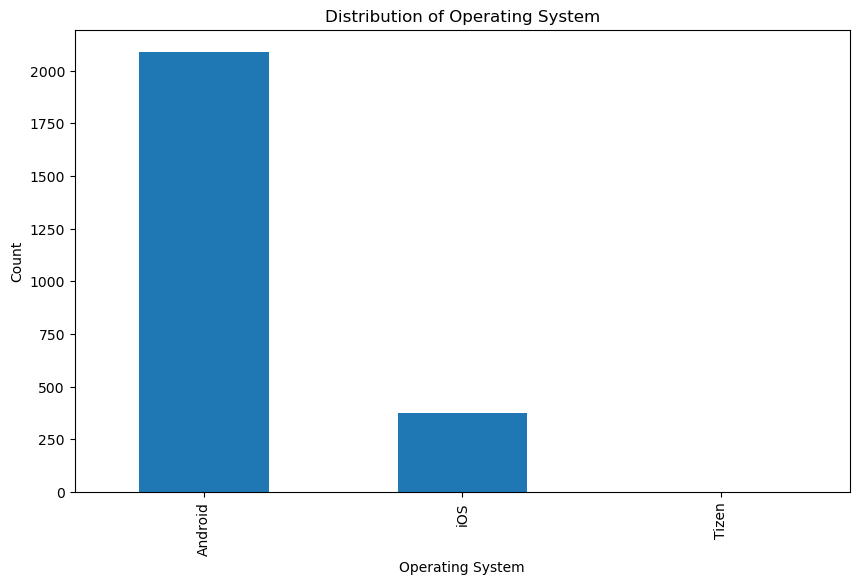

In [33]:
#ploting system feature
plt.figure(figsize=(10,6))
df_clean["System"].value_counts().plot(kind="bar")
plt.title("Distribution of Operating System")
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.show()

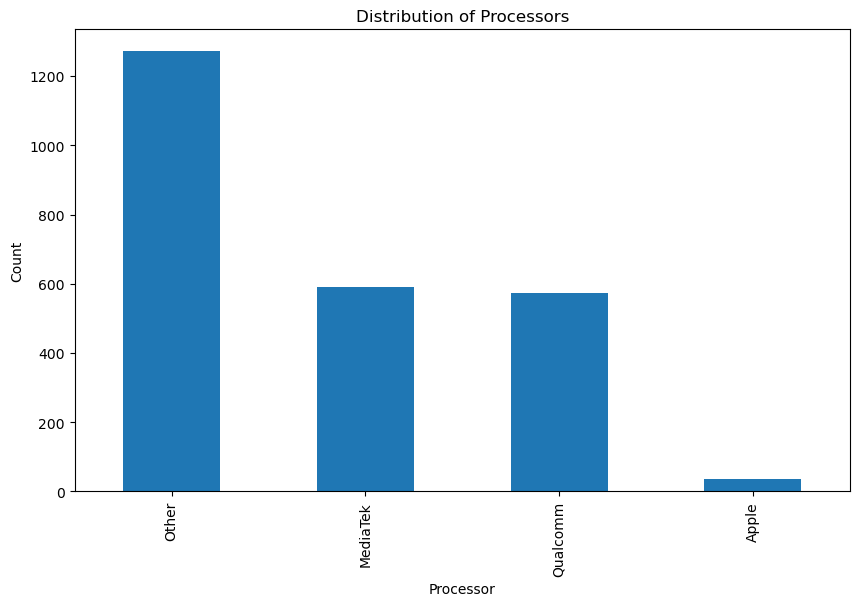

In [34]:
#plot processor feature
plt.figure(figsize=(10,6))
df_clean["Processor"].value_counts().plot(kind="bar")
plt.title("Distribution of Processors")
plt.xlabel("Processor")
plt.ylabel("Count")
plt.show()

In [37]:
def clean_price(price):
    cleaned_price=re.sub(r"\D","",price)
    try:
        return int(cleaned_price)
    except ValueError:
        return None
df_clean['price']=df_clean['price'].apply(clean_price)

df_clean.head()

C:\Users\sameer\AppData\Local\Temp\ipykernel_8828\3316765236.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price']=df_clean['price'].apply(clean_price)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android,MediaTek
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android,Other
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android,Qualcomm
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other


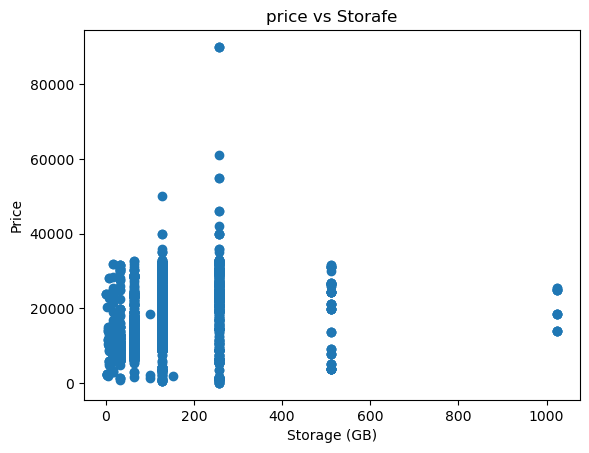

0.27088522618019106

In [47]:
plt.scatter(df_clean['Storage'],df_clean["price"])
plt.title("price vs Storafe")
plt.xlabel("Storage (GB)")
plt.ylabel("Price")
plt.show()
#correlation coeff between price and storage
correlation=df_clean['price'].corr(df_clean["Storage"])
correlation

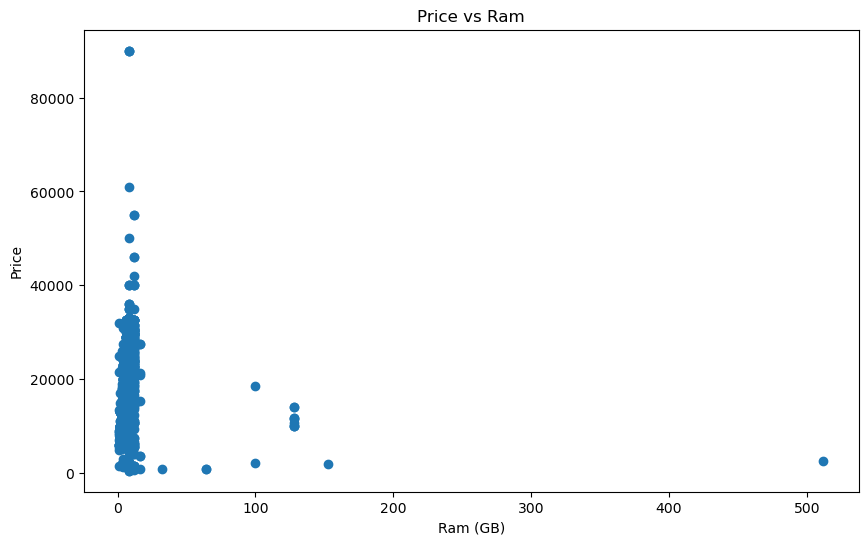

0.02916717859102832

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean["RAM"],df_clean["price"])
plt.title("Price vs Ram")
plt.xlabel("Ram (GB)")
plt.ylabel("Price")
plt.show()
#
correlation=df_clean['price'].corr(df_clean["RAM"])
correlation

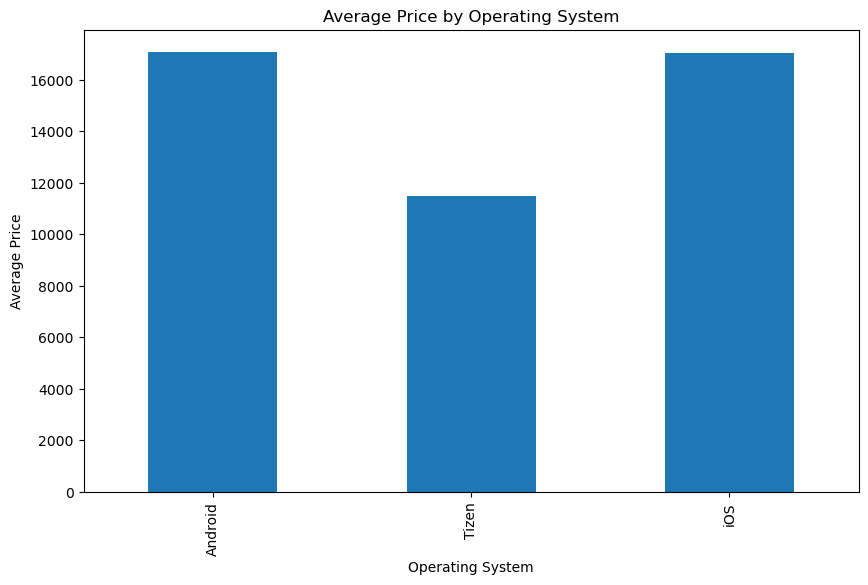

In [51]:
# Calculate the average price for each system
avg_price_system = df_clean.groupby('System')['price'].mean()

# Plot a bar chart of the average price for each system
plt.figure(figsize=(10, 6))
avg_price_system.plot(kind='bar')
plt.title('Average Price by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Price')
plt.show()

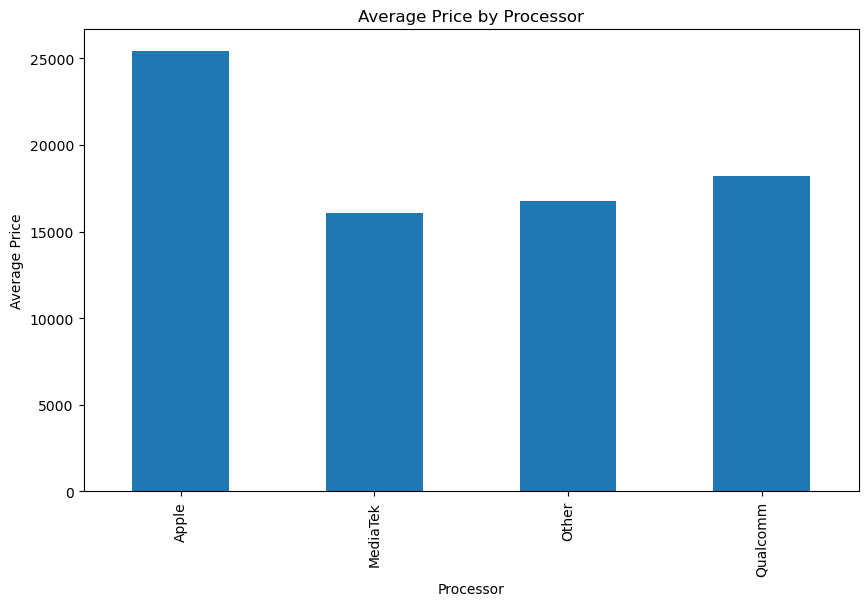

In [53]:
# Calculate the average price for each processor
avg_price_processor = df_clean.groupby('Processor')['price'].mean()

# Plot a bar chart of the average price for each processor
plt.figure(figsize=(10, 6))
avg_price_processor.plot(kind='bar')
plt.title('Average Price by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Price')
plt.show()

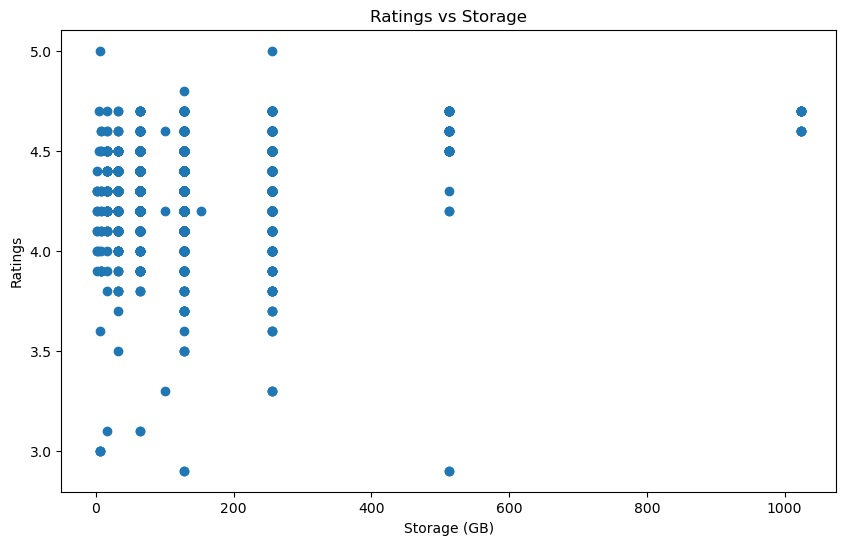

0.2069042283448843

In [54]:
# Plot a scatter plot of 'ratings' vs 'Storage'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Storage'], df_clean['ratings'])
plt.title('Ratings vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Ratings')
plt.show()

# Calculate the correlation coefficient between 'ratings' and 'Storage'
correlation = df_clean['ratings'].corr(df_clean['Storage'])

correlation

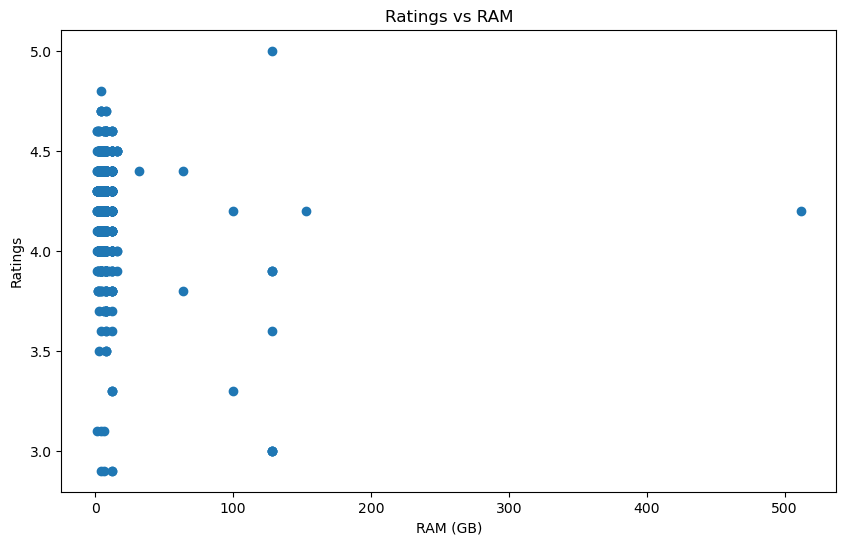

In [55]:
# Plot a scatter plot of 'ratings' vs 'RAM'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['RAM'], df_clean['ratings'])
plt.title('Ratings vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Ratings')
plt.show()

# Calculate the correlation coefficient between 'ratings' and 'RAM'
correlation = df_clean['ratings'].corr(df_clean['RAM'])



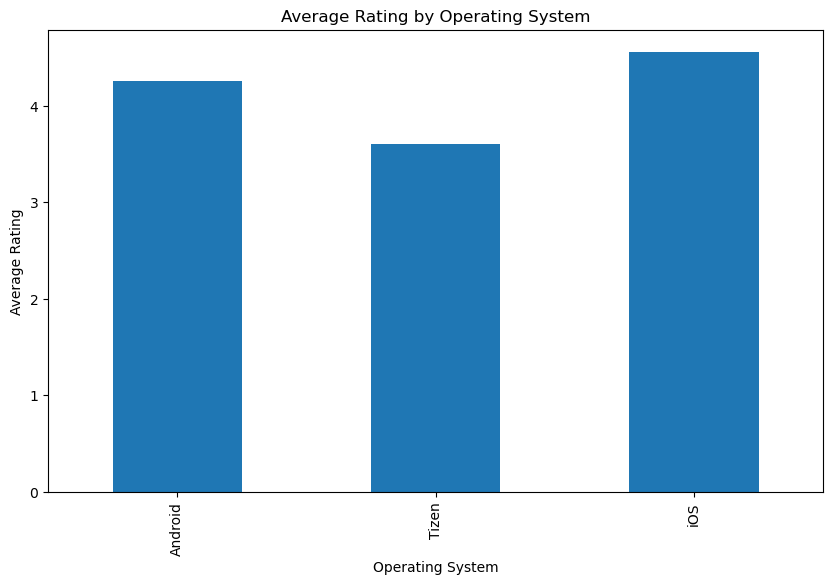

In [56]:
# Calculate the average rating for each system
avg_rating_system = df_clean.groupby('System')['ratings'].mean()

# Plot a bar chart of the average rating for each system
plt.figure(figsize=(10, 6))
avg_rating_system.plot(kind='bar')
plt.title('Average Rating by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Rating')
plt.show()

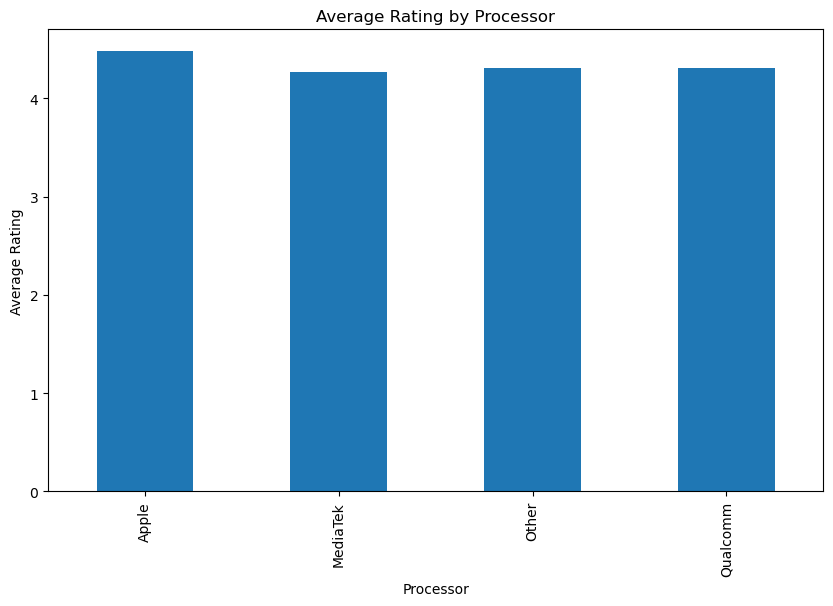

In [58]:
# Calculate the average rating for each processor
avg_rating_processor = df_clean.groupby('Processor')['ratings'].mean()

# Plot a bar chart of the average rating for each processor
plt.figure(figsize=(10, 6))
avg_rating_processor.plot(kind='bar')
plt.title('Average Rating by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Rating')
plt.show()

In [59]:
def extract_brand(name):
    """Extract the brand from the name."""
    return name.split()[0]

# Apply the function to the 'name' column
df_clean['Brand'] = df_clean['name'].apply(extract_brand)

# Check the first few rows of the DataFrame
df_clean.head()

C:\Users\sameer\AppData\Local\Temp\ipykernel_8828\671607510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Brand'] = df_clean['name'].apply(extract_brand)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android,MediaTek,REDMI
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek,OPPO
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android,Other,REDMI
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android,Qualcomm,OnePlus
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other,APPLE


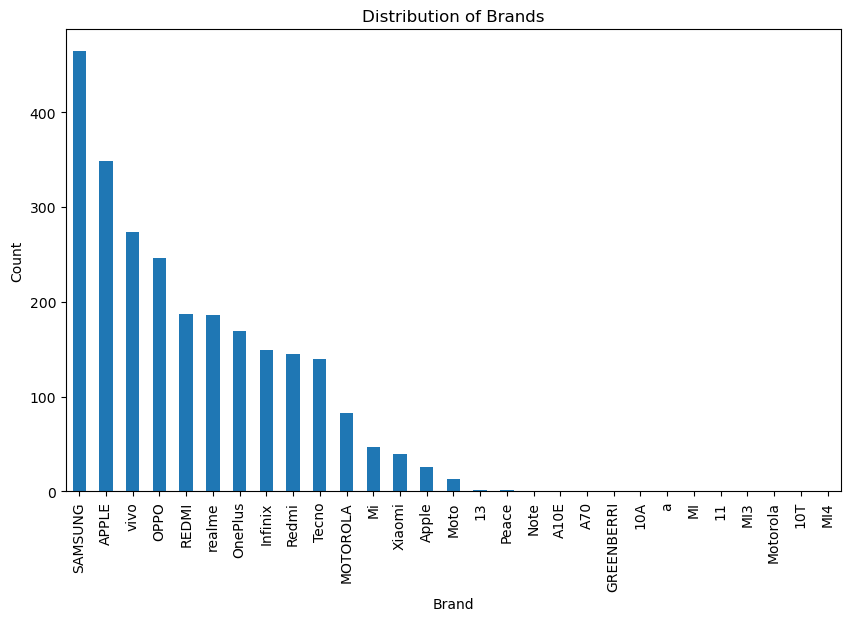

In [60]:
# Plot a bar chart of the brands
plt.figure(figsize=(10, 6))
df_clean['Brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

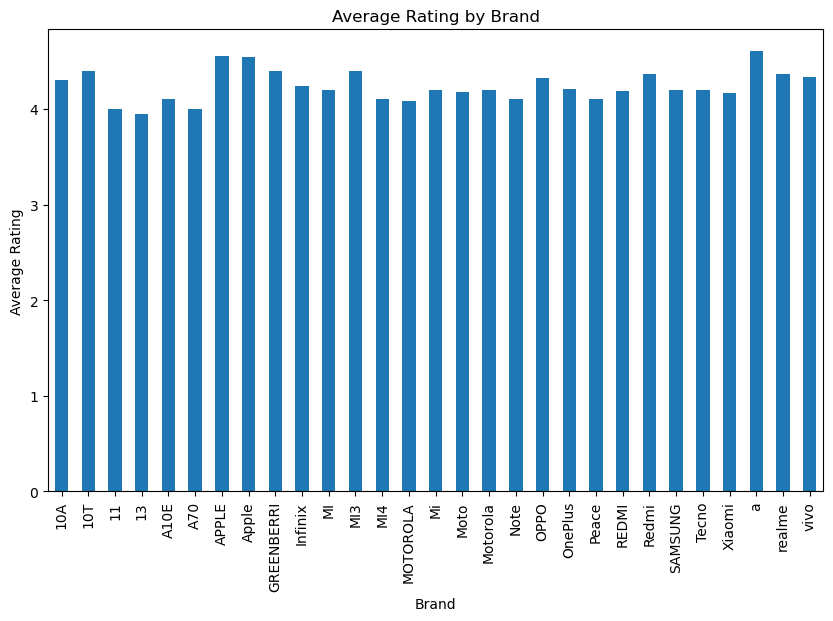

In [61]:
# Calculate the average rating for each brand
avg_rating_brand = df_clean.groupby('Brand')['ratings'].mean()

# Plot a bar chart of the average rating for each brand
plt.figure(figsize=(10, 6))
avg_rating_brand.plot(kind='bar')
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()

In [62]:
def recommend_devices(preferred_brand, preferred_system, min_price, max_price):
    """Recommend devices based on user preferences."""
    # Filter the DataFrame based on the user's preferences
    df_filtered = df_clean[
        (df_clean['Brand'] == preferred_brand) &
        (df_clean['System'] == preferred_system) &
        (df_clean['price'] >= min_price) &
        (df_clean['price'] <= max_price)
    ]
    
    # Sort the filtered DataFrame by ratings, and select the top 5 devices
    recommendations = df_filtered.sort_values(by='ratings', ascending=False).head(5)
    
    return recommendations

# Test the function with some example preferences
recommend_devices(preferred_brand='Apple', preferred_system='iOS', min_price=50000, max_price=80000)

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand


In [63]:
def recommend_devices(preferred_brand, preferred_system, min_price, max_price):
    """Recommend devices based on user preferences."""
    # Filter the DataFrame based on all user's preferences
    df_filtered = df_clean[
        (df_clean['Brand'] == preferred_brand) &
        (df_clean['System'] == preferred_system) &
        (df_clean['price'] >= min_price) &
        (df_clean['price'] <= max_price)
    ]
    
    # If no devices match all preferences, filter based on brand and price range
    if df_filtered.empty:
        df_filtered = df_clean[
            (df_clean['Brand'] == preferred_brand) &
            (df_clean['price'] >= min_price) &
            (df_clean['price'] <= max_price)
        ]
    
    # If still no devices match, filter based on price range only
    if df_filtered.empty:
        df_filtered = df_clean[
            (df_clean['price'] >= min_price) &
            (df_clean['price'] <= max_price)
        ]
    
    # Sort the filtered DataFrame by ratings, and select the top 5 devices
    recommendations = df_filtered.sort_values(by='ratings', ascending=False).head(5)
    
    return recommendations

# Test the function with some example preferences
recommend_devices(preferred_brand='Apple', preferred_system='iOS', min_price=50000, max_price=80000)

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand
297,"OPPO Reno10 Pro+ 5G (Silvery Grey, 256 GB)",4.6,54999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 13Processor ...,256.0,12.0,Android,Other,OPPO
1633,"OPPO Reno10 Pro+ 5G (Glossy Purple, 256 GB)",4.6,54999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 13Processor ...,256.0,12.0,Android,Other,OPPO
1128,"OPPO Find X (Glacier Blue, 256 GB)",4.4,60990,https://rukminim2.flixcart.com/image/312/312/j...,Storage256 GBRAM8 SystemAndroid Oreo 8.1.0Pro...,256.0,8.0,Android,Other,OPPO
